
<center>
<img src='../imagens/A20230615_MozambiqueChannel_sm.jpg' width='600px'/>
<div style="font-size: 12px"> Fonte: <a href="https://oceancolor.gsfc.nasa.gov/gallery/788/">NASA </a></div>

# **M√≥dulo 2: Fundamentos de Sensoriamento Remoto Aplicado aos Oceanos**

</center>

## Dia 2: Como procurar, baixar e visualizar imagens de sat√©lite

_**Autores:** Eligio Maure_

---


<!-- Download local -->
<div style="display: flex; align-items: center;">
	<a href="https://github.com/Elgyii/Treinamento-em-Sensoriamento-Remoto-Aplicado-ECOPs-2025/blob/main/modulo2/modulo2d2.ipynb" download>
		<img src="http://yyahn.com/netsci-course/images/download_icon.png"
					style="vertical-align: -8px; margin-right: 10px;" />
		<strong>Baixar o notebook</strong>
	</a>
</div>

<!-- Abrir no Colab -->
<div style="display: flex; align-items: center;">
	<a target="_blank"
			href="https://colab.research.google.com/github/Elgyii/Treinamento-em-Sensoriamento-Remoto-Aplicado-ECOPs-2025/blob/main/modulo2/modulo2d2.ipynb">
		<img src="https://www.tensorflow.org/images/colab_logo_32px.png"
					style="vertical-align: -8px; margin-right: 10px;" />
		<strong>Abrir no Google Colab</strong>
	</a>
</div>

## Resumo

Atualmente, existem v√°rias formas de acessar aos dados de sat√©lite, mas neste notebook, vamos explorar m√©todos interativos para pesquisar, baixar e analisar imagens de sat√©lite utilizando Python. Os exemplos estao baseados em dados distribu√≠dos por tr√™s grandes ag√™ncias: NASA ([Ocean Color Web](https://oceancolor.gsfc.nasa.gov/)), ESA ([Marine Copernicus Service](https://marine.copernicus.eu/)) e JAXA ([G-Portal](https://gportal.jaxa.jp/gpr/?lang=en)).

Esses dados podem ser baixados para o computador ou acessados e analisados diretamente na nuvem. Tamb√©m vamos discutir as vantagens e limita√ß√µes dos dados oferecidos por cada um dos Centros Distribu√≠dos de Arquivo de Dados (DAAC).

### Fontes e Ferramentas
<table style="border-style: hidden; border-collapse: collapse; vertical-align: top">
  <tr>
    <td style="vertical-align: top; width: 40%;">
      <ul>
        <li><strong><a href="https://oceancolor.gsfc.nasa.gov/">NASA (Ocean Color Web)</a></strong>
          <ul>
            <li><a href="https://cmr.earthdata.nasa.gov/search/site/docs/search/api.html">NASA's CMR API</a></li>
            <li><a href="https://oceandata.sci.gsfc.nasa.gov/opendap/">OB.DAAC OPENDAP</a></li>
            <li><a href="https://oceandata.sci.gsfc.nasa.gov/api/file_search/">OB.DAAC File Search</a></li>
          </ul>
        </li>
        <li><strong><a href="https://marine.copernicus.eu/">ESA (Copernicus Marine Service)</a></strong>
          <ul>
            <li><a href="https://toolbox-docs.marine.copernicus.eu/en/v2.0.0/usage/quickoverview.html">Copernicus Marine Toolbox</a></li>
            <li><a href="https://data.marine.copernicus.eu/products">Copernicus Marine Data Store</a></li>
          </ul>
        </li>
        <li><strong><a href="https://gportal.jaxa.jp/gpr/?lang=en">JAXA (G-Portal)</a></strong>
          <ul>
            <li><a href="https://gportal.jaxa.jp/gpr/assets/mng_upload/COMMON/upload/GPortalUserManual_en.pdf">CSW (Catalogue Service for the Web)</a></li>
            <li><a href="https://gportal.jaxa.jp/gpr/search?tab=1">G-Portal Data Search</a></li>
          </ul>
        </li>
      </ul>
    </td>
    <td style="vertical-align: top; width: 60%;border-style: hidden; border-collapse: collapse; ">
      <img src="../imagens/C20250917123947.png" alt="Fluxograma de Aprendizagem" width="100%" style="border-radius:5px">
			<div style="font-size: 0.8em; color: #555; margin-top: 4px;">
    		Fonte: Eligio Maure (adaptada com Microsoft Copilot)
  		</div>
    </td>
  </tr>
</td>

</table>

Antes de come√ßarmos a buscar e acessar os dados, √© importante entender os diferentes tipos de informa√ß√µes que essas plataformas oferecem e como elas s√£o distribu√≠das.


## Objetivos de Aprendizagem

Ao concluir este notebook, voc√™ ser√° capaz de:

* Explicar os diferentes **n√≠veis de dados de sat√©lite (L0‚ÄìL4)** e suas fun√ß√µes
* Comparar as **vantagens e desvantagens** de cada n√≠vel, escolhendo o mais adequado para sua aplica√ß√£o
* Pesquisar, baixar e analisar **dados oce√¢nicos de sat√©lite** (ex. cor do oceano, SST, salinidade)
* Utilizar as bibliotecas `earthaccess`, `copernicusmarine` e `requests` para buscar e acessar (ou baixar) imagens de sat√©lite
* Criar **visualiza√ß√µes georreferenciadas** usando `matplotlib`, `cartopy` e `xarray`

<a id="conteudos"></a>

## Conte√∫dos

1. [N√≠veis dos Dados de Sat√©lite](#data_levels)  
2. [Carregar Bibliotecas](#setup)  
3. [Autentica√ß√£o](#auth)
4. [Pesquisar os Dados](#search)  
5. [Baixar ou Acessar](#download)  
6. [Visualizar Imagens](#plot)  
7. [Repetir 3-6 para ESA](#esa_auth)
8. [Repetir 3-6 para JAXA](#jaxa_auth)


<a id="data_levels"></a>

## N√≠veis dos Dados de Sat√©lite
Os dados de sat√©lite s√£o organizados em n√≠veis (L0 a L4) que indicam o grau de processamento.   
O nosso foco neste curso ser√° **L2 e L3**, pois estes dados j√° est√£o prontos para an√°lise cient√≠fica em Python.

<table>
  <thead>
    <tr>
      <th>N√≠vel</th>
      <th>Tipo de Dados</th>
      <th>Fun√ß√£o</th>
      <th>Facilidade de Uso</th>
      <th>Exemplo de Aplica√ß√£o</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>0 (L0)</strong></td>
      <td>Dados brutos reconstru√≠dos (artefatos de comunica√ß√£o removidos)</td>
      <td>Armazenamento inicial</td>
      <td>üî¥ Muito dif√≠cil</td>
      <td>Processamento por ag√™ncias espaciais</td>
    </tr>
    <tr>
      <td><strong>1A (L1A)</strong></td>
      <td>Dados com refer√™ncias temporal e espacial (informa√ß√£o de calibra√ß√£o e georrefer√™ncia)</td>
      <td>Base para calibra√ß√£o</td>
      <td>üî¥ Muito dif√≠cil</td>
      <td>Engenheiros processando sinais de sat√©lite</td>
    </tr>
    <tr>
      <td><strong>1B (L1B)</strong></td>
      <td>Dados convertidos para unidades f√≠sicas do sensor</td>
      <td>Prepara√ß√£o para an√°lise</td>
      <td>üî¥ Dif√≠cil</td>
      <td>Radi√¢ncias (sinal capturado pelo sat√©lite - TOA)</td>
    </tr>
    <tr>
      <td><strong>2 (L2)</strong></td>
      <td>Vari√°veis geof√≠sicas derivadas, mesma resolu√ß√£o do sensor</td>
      <td>Aplica√ß√£o direta em estudos ambientais</td>
      <td>üü° Intermedi√°rio</td>
      <td>Clorofila-a, SST, salinidade</td>
    </tr>
    <tr>
      <td><strong>3 (L3)</strong></td>
      <td>Dados agregados no tempo e espa√ßo</td>
      <td>An√°lises temporais e espaciais</td>
      <td>üü¢ F√°cil</td>
      <td>S√©ries temporais de Clorofila di√°ria/mensal, SST m√©dia global</td>
    </tr>
    <tr>
      <td><strong>4 (L4)</strong></td>
      <td>Modelos e an√°lises avan√ßadas</td>
      <td>Aplica√ß√µes espec√≠ficas</td>
      <td>üü¢ F√°cil</td>
      <td>Produtividade prim√°ria, fluxos de carbono</td>
    </tr>
  </tbody>
</table>

Veja tamb√©m: [NASA Earthdata ‚Äì Data Processing Levels](https://www.earthdata.nasa.gov/learn/earth-observation-data-basics/data-processing-levels)

### Vantagens e Desvantagens de Cada N√≠vel

Na maioria das aplica√ß√µes, trabalhamos com dados de **N√≠vel 3** e **N√≠vel 4**. Em casos espec√≠ficos, como calibra√ß√£o de imagens de sat√©lite com dados de observa√ß√£o (in-situ) ou em estudos costeiros, o **N√≠vel 2** √© essencial. Os n√≠veis mais primitivos (abaixo do 2) s√£o raramente utilizados.

| **N√≠vel** | **Vantagens** | **Desvantagens** |
|:----------|:--------------|:------------------|
| **L2** | Dados nativos, preservam a resolu√ß√£o espacial e geometrica do sensor. √öteis para a valida√ß√£o in-situ e em estudos costeiros. | Imagens geometricamente distorcidas, n√£o compar√°veis diretamente. Requerem triagem de qualidade. Tem ficheiros pesados.<br><div style="font-size:11px; background-color:rgba(128,128,128,0.15); padding:4px; border-radius:4px"><em>Exemplo: clorofila-a Sentinel-3 OLCI em regi√µes costeiras.</em></div> |
| **L3** | Dados em grades uniformes, ideais para s√©ries temporais e compara√ß√µes regionais. | Perda de resolu√ß√£o nativa. A reamostragem introduz artefatos.<br><div style="font-size:11px; background-color:rgba(128,128,128,0.15); padding:4px; border-radius:4px"><em>Exemplo: s√©ries mensais de SST global (MODIS, AVHRR).</em></div> |
| **L4** | Produtos derivados ou de fus√£o de dois ou mais sensores, aumentando cobertura espacio-temporal<br><div style="font-size:11px; background-color:rgba(128,128,128,0.15); padding:4px; border-radius:4px"><em>Exemplo: as nuvens afectam os sensores √≥pticos reduzindo ou bloqueando a visibilidade da superficie alvo</em></div>| Incertezas maiores por suposi√ß√µes de modelos.<br><div style="font-size:11px; background-color:rgba(128,128,128,0.15); padding:4px; border-radius:4px"><em>Exemplo: produtividade prim√°ria global, rean√°lises de correntes oce√¢nicas.</em></div> |

[‚¨ÜÔ∏è Voltar ao topo](#conteudos)


<a id="setup"></a>

## Carregar Bibliotecas
A c√©lula abaixo carrega as bibliotecas necess√°rias para os exerc√≠cios.  
Caso alguma biblioteca n√£o esteja instalada, ela ser√° instalada automaticamente.

In [1]:
import sys
import subprocess

def instalar(pacote):
    """Instala a biblioteca base (sem subm√≥dulos)"""
    base = pacote.split('.')[0]
    subprocess.check_call([sys.executable, "-m", "pip", "install", base])

def importar(pacote, nome=None):
    """Importa a biblioteca (com subm√≥dulos se necess√°rio)"""
    if nome:
        globals()[nome] = __import__(pacote, fromlist=[''])
    else:
        globals()[pacote] = __import__(pacote, fromlist=[''])

def tentar_importar(pacote, nome=None):
    """Tenta importar, instala se n√£o existir"""
    lib = "cv2" if pacote == "opencv-python" else pacote
    try:
        importar(lib, nome)
    except (ImportError, FileNotFoundError):
        print(f"Pacote '{pacote}' n√£o encontrado. Instalando...")
        instalar(pacote)
        importar(lib, nome)

try:
    import google.colab
    ambiente = "colab"
except ImportError:
    ambiente = "local"

print(f"Ambiente detectado: {ambiente}")

if ambiente == "colab":
	# Lista de pacotes
	pacotes = {
		"tqdm.notebook": "tqdm",
		"earthaccess": None,
		"copernicusmarine": None,
		"numpy": "np",
		"cartopy.crs": "ccrs",
		"matplotlib.pyplot": "plt",
		"xarray": "xr",
		"requests": None,
	}

	for pacote, alias in pacotes.items():
		tentar_importar(pacote, alias)
else:
	pacotes = { "tqdm.notebook": "tqdm" }
	for pacote, alias in pacotes.items():
		tentar_importar(pacote, alias) 
	print("copia este comando para o terminal de miniforge")
	print('\tconda install -n teste ipykernel --update-deps --force-reinstall -y')
	print("\tconda install scipy tqdm earthaccess copernicusmarine cartopy matplotlib xarray requests -y")


Ambiente detectado: local
copia este comando para o terminal de miniforge
	conda install -n teste ipykernel --update-deps --force-reinstall -y
	conda install scipy tqdm earthaccess copernicusmarine cartopy matplotlib xarray requests -y


In [2]:
from tqdm.notebook import tqdm
from pathlib import Path

import earthaccess
import copernicusmarine
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
import requests

[‚¨ÜÔ∏è Voltar ao topo](#conteudos)

<a id="auth"></a>

## Autentica√ß√£o

### Earthdata da NASA

<div class="alert alert-info" style="border-radius:5px" role="alert">
A autentica√ß√£o n√£o √© necess√°ria para pesquisar cole√ß√µes dispon√≠veis publicamente no Earthdata, mas √© sempre necess√°ria para acessar ou baixar os dados. O m√©todo <code>login</code> da biblioteca <code>earthaccess</code> permite autenticar o usu√°rio e ajuda a criar uma sess√£o autenticada. Se as credenciais n√£o forem encontradas em um arquivo local chamado <code>.netrc</code>, um prompt interativo ser√° exibido, permitindo que voc√™ insira suas credenciais (nome de usu√°rio e senha separadamente).
</div>

In [3]:
nasa_auth = earthaccess.login(persist=True)

[‚¨ÜÔ∏è Voltar ao topo](#conteudos)

<a id="search"></a>

## Pesquisar os Dados

<div class="alert alert-info" style="border-radius:5px" role="alert">
Cole√ß√µes no NASA Earthdata s√£o descobertas com a fun√ß√£o <code>search_datasets</code>, que aceita um filtro <code>instrument</code> como uma maneira f√°cil de come√ßar a pesquisa. Cada item retornado na lista de cole√ß√µes tem um <code>short_name</code>  associado a um determinado instrumento.
</div>


In [4]:
results = earthaccess.search_datasets(instrument="modis")
len(results)

1223

In [5]:
for item in results:
    summary = item.summary()
    print(summary["short-name"])

CIESIN_SEDAC_USPAT_USUEXT2015
Sat_ActiveLayer_Thickness_Maps_1760
ABoVE_MODIS_MAIAC_Reflectance_1858
Wildfires_NWT_Canada_1548
Wildfires_2014_NWT_Canada_1307
Burned_Area_Depth_AK_CA_2063
MODIS_MAIAC_Reflectance_1700
Dall_Sheep_Population_Dynamics_1640
Dall_Sheep_Snowpack_1602
Effect_Environment_Moose_1739
ABoVE_Frac_Open_Water_1362
Snow_Cover_Extent_and_Depth_1757
BurnedArea_Emissions_AK_YT_NWT_1812
Last_Day_Spring_Snow_1528
GPP_MODIS_Alaska_Canada_2024
MODIS_CCaN_NDVI_Trends_Alaska_1666
Albedo_Boreal_North_America_1605
Alaska_Yukon_NDVI_1614
NorthSlope_NEE_TVPRM_1920
Wildfires_Date_of_Burning_1559
Wolves_Denning_Pups_Climate_1846
AGB_Pantropics_Amazon_Mexico_1824
ACTIVATE-MODIS-MERRA2
ADAM.Surface.Reflectance.Database
CIESIN_AfSIS_MODIS_ALB2012
CIESIN_AfSIS_MODIS_LCT2012
CIESIN_AfSIS_MODIS_LST201404
CIESIN_AfSIS_MODIS_LAIFPAR2012
CIESIN_AfSIS_MODIS_PP2012
CIESIN_AfSIS_MODIS_VEGIN201404
aad_ais_gz_modis_slope_break
AMDBLWV
AMDBLWV
AMMBLWV
AMMBLWV
NSIDC-0432
UNIZH_AGREG
CIESIN_SEDAC_SDE

Em seguida, utilizamos a fun√ß√£o `search_data` para localizar gr√¢nulos dentro de uma cole√ß√£o. Vamos usar o `short_name` para localizar a imagem no topo deste notebook, que √© uma visualiza√ß√£o r√°pida do MODIS-Aqua N√≠vel 2, de 15 de junho de 2023, das propriedades biogeoqu√≠micas do Canal de Mo√ßambique.

<div class="alert alert-info" style="border-radius:5px" role="alert">
O nome curto tamb√©m pode ser encontrado no <a href="https://search.earthdata.nasa.gov/search?fi=SPEXone!HARP2!OCI" target="_blank">Earthdata Search</a>, diretamente abaixo do nome da cole√ß√£o, ap√≥s clicar no √≠cone <code>i</code> em qualquer resultado de pesquisa.
</div>

O argumento `count` limita o n√∫mero de gr√¢nulos retornados e armazenados na lista de `resultados`, mas n√£o restringe o n√∫mero de gr√¢nulos encontrados na pesquisa.

In [6]:
results = earthaccess.search_data(
    short_name="MODISA_L2_OC",
    count=1,
)
results

[Collection: {'Version': '2022.0', 'ShortName': 'MODISA_L2_OC'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': -57.75776, 'Longitude': -131.97397}, {'Latitude': -64.02428, 'Longitude': -175.68571}, {'Latitude': -81.55584, 'Longitude': 173.66614}, {'Latitude': -69.34761, 'Longitude': -99.36409}, {'Latitude': -57.75776, 'Longitude': -131.97397}]}}]}}}
 Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2002-07-04T00:40:00Z', 'EndingDateTime': '2002-07-04T00:44:59Z'}}
 Size(MB): 24.581233024597168
 Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/AQUA_MODIS.20020704T004000.L2.OC.nc']]

Podemos refinar nossa busca fornecendo par√¢metros adicionais que descrevem o dom√≠nio espa√ßo-temporal do nosso exemplo. A seguir, `temporal` √© usado para especificar um intervalo de tempo desejado e `bounding_box (lower_left_lon, lower_left_lat, upper_right_lon, upper_right_lat)` para solicitar gr√¢nulos que intersectem o espa√ßo geografico de interesse.

Al√©m disso, podemos fornecer um limite `cloud_cover` para restringir os arquivos que possuem uma porcentagem menor de cobertura de nuvens. Uma vez que n√£o fornecemos um valor para o par√¢metro `count`, todos os gr√¢nulos que atenderem √†s restri√ß√µes acima ser√£o retornados.

In [7]:
tspan = ("2023-06-15", "2023-06-15")
bbox = (30, -30, 60, -10)
clouds = (0, 50)

In [8]:
results = earthaccess.search_data(
    short_name="MODISA_L2_OC",
    cloud_hosted=True,
    temporal=tspan,
    bounding_box=bbox,
    cloud_cover=clouds,
)
results

[Collection: {'Version': '2022.0', 'ShortName': 'MODISA_L2_OC'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': -18.8658, 'Longitude': 74.02033}, {'Latitude': -22.06709, 'Longitude': 51.86351}, {'Latitude': -40.05075, 'Longitude': 54.17412}, {'Latitude': -36.20518, 'Longitude': 80.7999}, {'Latitude': -18.8658, 'Longitude': 74.02033}]}}]}}}
 Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2023-06-15T09:45:00Z', 'EndingDateTime': '2023-06-15T09:49:59Z'}}
 Size(MB): 51.70269012451172
 Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/AQUA_MODIS.20230615T094500.L2.OC.nc'],
 Collection: {'Version': '2022.0', 'ShortName': 'MODISA_L2_OC'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': -14.70702, 'Longitude': 48.07363}, {'Latitude': -17.82608, 'Longitude': 26.49398}, {'Latitude': -35.81696, 'Longitude': 29.00514}, {'Latitude': -3

[‚¨ÜÔ∏è Voltar ao topo](#conteudos)

<a id="download"></a>

## Baixar ou Acessar

<div class="alert alert-info" style="border-radius:5px" role="alert">
Para baixar os gr√¢nulos (imagens) retornadas, a fun√ß√£o <code>earthaccess.open</code> aceita a lista de resultados de <code>earthaccess.search_data</code> e retorna uma lista de objetos semelhantes a arquivos. Nenhum arquivo real √© transferido neste processo.
</div>


In [9]:
paths = earthaccess.open(results)
paths

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

[<File-like object HTTPFileSystem, https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/AQUA_MODIS.20230615T094500.L2.OC.nc>,
 <File-like object HTTPFileSystem, https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/AQUA_MODIS.20230615T112500.L2.OC.nc>,
 <File-like object HTTPFileSystem, https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/AQUA_MODIS.20230615T113000.L2.OC.nc>]

In [10]:
directory = Path("L2")
directory.mkdir(exist_ok=True)
paths = earthaccess.download(results, directory)

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


[‚¨ÜÔ∏è Voltar ao topo](#conteudos)

<a id="plot"></a>

## Visualizar Imagens

<div class="alert alert-info" style="border-radius:5px" role="alert">
O m√©todo <code>earthaccess.open</code> permite abrir imagens diretamente, sem a necessidade de fazer o download completo. No entanto, mesmo que essa abordagem pare√ßa conveniente, ela apresenta desempenho muito limitado quando n√£o √© executada em um ambiente com acesso direto √† Nuvem Earthdata da NASA (por exemplo, um host remoto autorizado).  
<br><br>
Por esse motivo, neste exemplo faremos a visualiza√ß√£o dos dados previamente baixados.
</div>


In [11]:
files = list(Path("L2").glob('*.nc'))
files

[WindowsPath('L2/AQUA_MODIS.20230615T094500.L2.OC.nc'),
 WindowsPath('L2/AQUA_MODIS.20230615T112500.L2.OC.nc'),
 WindowsPath('L2/AQUA_MODIS.20230615T113000.L2.OC.nc')]

In [12]:
def get_data(file, key, grp="geophysical_data"): 
	with xr.open_dataset(file, group=grp) as ds:
		data = ds[key]
	return data

In [13]:
from matplotlib.colors import LogNorm

In [14]:
file_path = files[1]
lon = get_data(file_path, 'longitude', 'navigation_data')
lat = get_data(file_path, 'latitude', 'navigation_data')
sds = get_data(file_path, 'chlor_a')

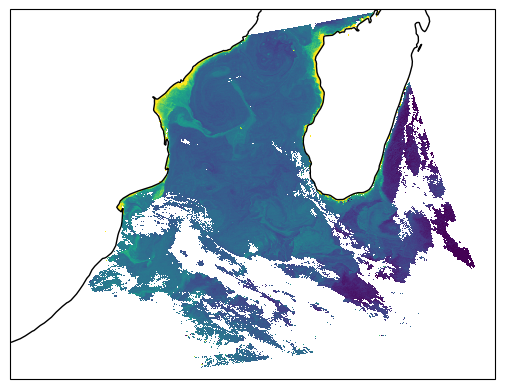

In [15]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.pcolormesh(lon, lat, sds, cmap='viridis', norm=LogNorm(0.05, 3))
ax.coastlines()

[‚¨ÜÔ∏è Voltar ao topo](#conteudos)

<div class="alert alert-success" role="alert">
Concluiu a parte de buscar, baixar e visualizar os dados utilizando o <code>earthaccess</code> da NASA. A partir de agora, o processo ser√° semelhante, mas utilizando a API do ESA com a biblioteca <code>copernicusmarine</code> e do JAXA com <code>requests</code>. 
Sugiro que retorne ao exerc√≠cio da NASA caso tenha alguma d√∫vida, ou coloque a sua d√∫vida para esclarecimento.
</div>


<a id="esa_auth"></a>

## Copernicus Marine Toolbox


In [16]:
if not Path.home().joinpath('.copernicusmarine/.copernicusmarine-credentials').is_file():
	auth = copernicusmarine.login()

In [17]:
dataset_id = "c3s_obs-sl_glo_phy-ssh_my_twosat-l4-duacs-0.25deg_P1D"

In [19]:
variables = ["sla", 'ugos', 'vgos']

# Download the data
copernicusmarine.subset(
    dataset_id=dataset_id,
    minimum_longitude=bbox[0],
    maximum_longitude=bbox[2],
    minimum_latitude=bbox[1],
    maximum_latitude=bbox[3],
    start_datetime=f'{tspan[0]}T00:00:00',
    end_datetime=f'{tspan[1]}T23:59:59',
    variables=variables,
    output_directory="L3",
    skip_existing=True
)

print("Sucesso!")

INFO - 2025-09-18T09:51:33Z - Selected dataset version: "202411"
INFO - 2025-09-18T09:51:33Z - Selected dataset part: "default"


Sucesso!


In [20]:
file_path, = list(Path("L3").glob('*.nc'))

In [21]:
ds = xr.open_dataset(file_path)
u, v = ds.ugos.isel(time=0), ds.vgos.isel(time=0)
u

<xarray.DataArray 'ugos' (latitude: 80, longitude: 120)> Size: 77kB
[9600 values with dtype=float64]
Coordinates:
  * latitude   (latitude) float32 320B -29.88 -29.62 -29.38 ... -10.38 -10.12
  * longitude  (longitude) float32 480B 30.12 30.38 30.62 ... 59.38 59.62 59.88
    time       datetime64[ns] 8B 2023-06-15
Attributes:
    units:          m/s
    long_name:      Absolute geostrophic velocity: zonal component
    standard_name:  surface_geostrophic_eastward_sea_water_velocity

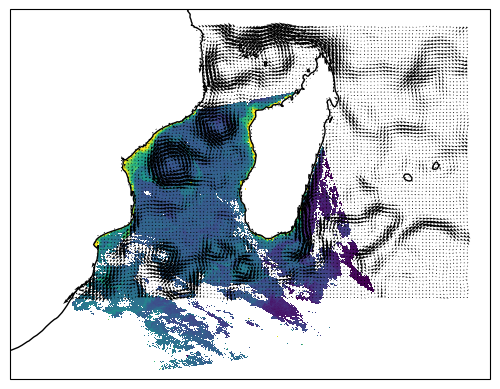

In [22]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.pcolormesh(lon, lat, sds, cmap='viridis', norm=LogNorm(0.05, 3))
ax.quiver(ds.longitude, ds.latitude, u, v)
ax.coastlines()

In [28]:
uv_lon = ds.longitude.values[::2]
uv_lat = ds.latitude.values[::2]
uu, vv = u.values[::2, ::2], v.values[::2, ::2]

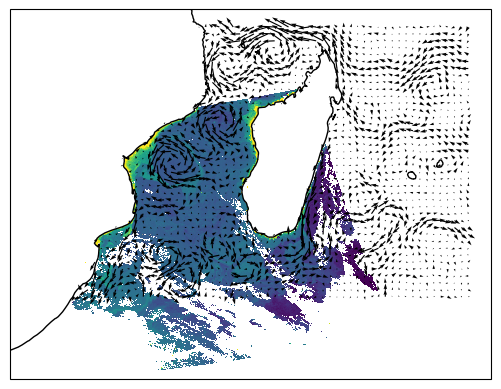

In [29]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.pcolormesh(lon, lat, sds, cmap='viridis', norm=LogNorm(0.05, 3))
ax.quiver(uv_lon, uv_lat, uu, vv)
ax.coastlines()

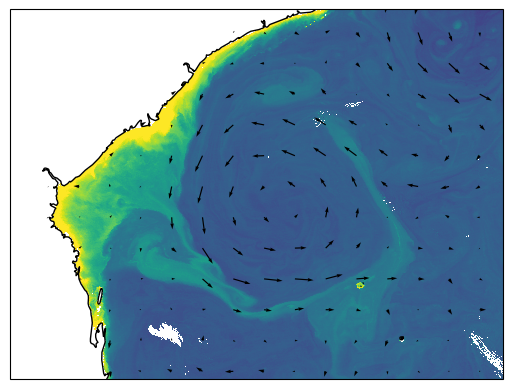

In [37]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.pcolormesh(lon, lat, sds, cmap='viridis', norm=LogNorm(0.05, 3))
ax.quiver(uv_lon, uv_lat, uu, vv)
ax.coastlines()
ax.set_extent((34, 42, -23, -17))

<a id="jaxa_auth"></a>

## Catalogue Service for the Web

In [38]:
bbx = ','.join(f'{i}' for i in bbox)
query = "https://gportal.jaxa.jp/csw/csw?service=CSW&version=3.0.0&request=GetRecords" \
    f"&outputFormat=application/json&pslv=L2&count=20&sen=SGLI&sat=GCOM-C&bbox={bbx}" \
    f"&startTime={tspan[0]}T00:00:00&endTime={tspan[1]}T23:59:59&Resolution=250m&datasetId=10002001"

response = requests.get(query)
response.raise_for_status()
content = response.json()
content


HTTPError: 503 Server Error: Service Unavailable for url: https://gportal.jaxa.jp/csw/csw?service=CSW&version=3.0.0&request=GetRecords&outputFormat=application/json&pslv=L2&count=20&sen=SGLI&sat=GCOM-C&bbox=30,-30,60,-10&startTime=2023-06-15T00:00:00&endTime=2023-06-15T23:59:59&Resolution=250m&datasetId=10002001

In [ ]:
urls = [
    feature["properties"]["product"]["fileName"]
    for feature in content.get("features", [])
    if (feature["properties"]["product"]['DataFormatType'] == 'HDF5' and 
        'IWPRQ' in feature["properties"]["product"]["fileName"])
]
urls


['https://gportal.jaxa.jp/download/standard/GCOM-C/GCOM-C.SGLI/L2.OCEAN.IWPR/3/2023/06/15/GC1SG1_202306150714R16014_L2SG_IWPRQ_3000.h5',
 'https://gportal.jaxa.jp/download/standard/GCOM-C/GCOM-C.SGLI/L2.OCEAN.IWPR/3/2023/06/15/GC1SG1_202306150710M16013_L2SG_IWPRQ_3000.h5',
 'https://gportal.jaxa.jp/download/standard/GCOM-C/GCOM-C.SGLI/L2.OCEAN.IWPR/3/2023/06/15/GC1SG1_202306150718V16015_L2SG_IWPRQ_3000.h5']

In [ ]:
def download(urls, directory="downloads"):
		"""Baixa arquivos a partir de uma lista de URLs."""
		Path(directory).mkdir(exist_ok=True)
		paths = []
		for url in tqdm(urls, total=len(urls), unit='File', desc='Downloading'):
			fname = Path(directory) / url.split("/")[-1]
			paths.append(str(fname))
			if fname.is_file():
				continue
			r = requests.get(url, stream=True)
			r.raise_for_status()
			with open(fname, "wb") as f:
				for chunk in r.iter_content(8192):
					f.write(chunk)
				paths.append(str(fname))
		return paths

In [ ]:
download(urls, 'L2')

Downloading:   0%|          | 0/3 [00:00<?, ?File/s]

['L2\\GC1SG1_202306150714R16014_L2SG_IWPRQ_3000.h5',
 'L2\\GC1SG1_202306150710M16013_L2SG_IWPRQ_3000.h5',
 'L2\\GC1SG1_202306150718V16015_L2SG_IWPRQ_3000.h5']

In [ ]:
files = list(Path("L2").glob('*.h5'))
files

[WindowsPath('L2/GC1SG1_202306150710M16013_L2SG_IWPRQ_3000.h5'),
 WindowsPath('L2/GC1SG1_202306150714R16014_L2SG_IWPRQ_3000.h5'),
 WindowsPath('L2/GC1SG1_202306150718V16015_L2SG_IWPRQ_3000.h5')]

In [ ]:
file_path = files[1]
ds = xr.open_dataset(file_path, group ='Image_data', phony_dims='sort')
ds

<xarray.Dataset> Size: 313MB
Dimensions:     (phony_dim_2: 7820, phony_dim_3: 5000)
Dimensions without coordinates: phony_dim_2, phony_dim_3
Data variables:
    CDOM        (phony_dim_2, phony_dim_3) uint16 78MB ...
    CHLA        (phony_dim_2, phony_dim_3) uint16 78MB ...
    Line_tai93  (phony_dim_2) float64 63kB ...
    QA_flag     (phony_dim_2, phony_dim_3) uint16 78MB ...
    TSM         (phony_dim_2, phony_dim_3) uint16 78MB ...
Attributes:
    Grid_interval:       250.0
    Grid_interval_unit:  meter
    Image_projection:    L1B reference grid
    Number_of_lines:     7820
    Number_of_pixels:    5000

In [ ]:
# DN * Slope + Offset
slope = ds.CHLA.attrs['Slope']
offset = ds.CHLA.attrs['Offset']
data = (ds.CHLA * slope  + offset).values
mask = (ds.CHLA==ds.CHLA.attrs['Error_DN']).values
data[mask] = np.nan

In [ ]:
gs = xr.open_dataset(file_path, group ='Geometry_data', phony_dims='sort')
gs

<xarray.Dataset> Size: 7MB
Dimensions:         (phony_dim_0: 783, phony_dim_1: 501)
Dimensions without coordinates: phony_dim_0, phony_dim_1
Data variables:
    Latitude        (phony_dim_0, phony_dim_1) float32 2MB ...
    Longitude       (phony_dim_0, phony_dim_1) float32 2MB ...
    Obs_time        (phony_dim_0, phony_dim_1) int16 785kB ...
    Sensor_azimuth  (phony_dim_0, phony_dim_1) int16 785kB ...
    Sensor_zenith   (phony_dim_0, phony_dim_1) int16 785kB ...
    Solar_azimuth   (phony_dim_0, phony_dim_1) int16 785kB ...
    Solar_zenith    (phony_dim_0, phony_dim_1) int16 785kB ...
Attributes: (12/15)
    Grid_interval:          2500.0
    Grid_interval_unit:     meter
    Image_projection:       L1B reference grid
    Latitude_unit:          degree North
    Longitude_unit:         degree East
    Lower_left_latitude:    -29.537664
    ...                     ...
    Number_of_lines:        783
    Number_of_pixels:       501
    Upper_left_latitude:    -12.910071
    Upper_left_longitude:   38.32775
    Upper_right_latitude:   -15.149362
    Upper_right_longitude:  53.074486

In [ ]:
extent = (gs.Longitude.min().values, gs.Longitude.max().values, 
           gs.Latitude.min().values, gs.Latitude.max().values)
extent

(array(33.17944, dtype=float32),
 array(53.079597, dtype=float32),
 array(-32.08146, dtype=float32),
 array(-12.910071, dtype=float32))

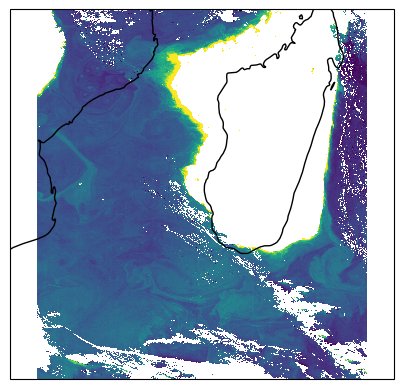

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.imshow(data, extent=extent, cmap='viridis', 
          norm=LogNorm(0.05, 3), interpolation='nearest')
ax.coastlines()


Precisamos mapear os dados

In [ ]:
def warp_sgli(lon, lat, new_shape):
    """
    Interpola√ß√£o bilinear de grade coarse (lon/lat) para fina
    """
    ds = xr.Dataset({ "lon": (("y", "x"), lon), "lat": (("y", "x"), lat)})
    
    ny, nx = new_shape
    x_new = np.linspace(0, lon.shape[1] - 1, nx)
    y_new = np.linspace(0, lon.shape[0] - 1, ny)

    lon_fine = ds.lon.interp(x=x_new, y=y_new).values
    lat_fine = ds.lat.interp(x=x_new, y=y_new).values
    return lon_fine, lat_fine

lon_fine, lat_fine = warp_sgli(gs.Longitude.values, gs.Latitude.values, data.shape)

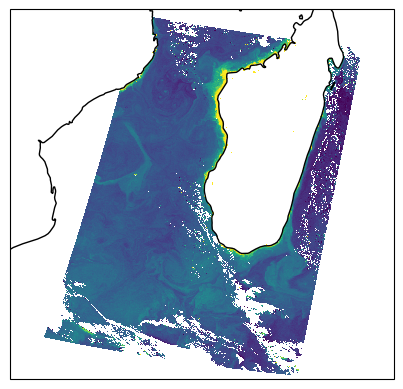

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.pcolormesh(lon_fine, lat_fine, data, cmap='viridis', norm=LogNorm(0.05, 3))
ax.coastlines()

## üìù Exerc√≠cios de Consolida√ß√£o

1. **N√≠veis de Dados**

   * Descreva os diferentes n√≠veis de dados de sat√©lite (L0‚ÄìL4).
   * Para cada n√≠vel, cite uma aplica√ß√£o pr√°tica em oceanografia.

2. **Compara√ß√£o L2 vs L3**

   * Quais s√£o as vantagens e desvantagens comparativas dos n√≠veis 2 e 3?
   * Em que situa√ß√µes escolheria um sobre o outro?

3. **Explora√ß√£o de Dados**

   * Usando as bibliotecas introduzidas (`earthaccess`, `copernicusmarine` ou `requests`), baixe e visualize dados de **SST** (temperatura da superf√≠cie do mar) para a mesma √°rea e intervalo de tempo usados nos exemplos de clorofila.
   * Compare visualmente as imagens de **SST vs Clorofila**.
   * Quais semelhan√ßas e diferen√ßas voc√™ observa? (padr√µes espaciais, influ√™ncia da din√¢mica oce√¢nica, regi√µes costeiras vs oceano aberto).





## Alguns Recursos

- [NASA OB.DAAC Tutorials](https://oceancolor.gsfc.nasa.gov/resources/docs/tutorials/)
- [Copernicus Marine Toolbox](https://toolbox-docs.marine.copernicus.eu/en/stable/)
- [G-Portal User's Guide](https://gportal.jaxa.jp/gpr/assets/mng_upload/COMMON/upload/GPortalUserManual_en.pdf)
- [G-Portal Unofficial](https://gportal.readthedocs.io/en/stable/)